# Data Preprocessing

### Import Libraries

In [ ]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

### Data Load


In [ ]:
data=pd.read_csv('/content/Mobile Price Prediction.csv')

### Data Understanding

In [ ]:
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [ ]:
data.tail()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799
835,835,Blacear B5 Grip,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [ ]:
data.shape

(836, 10)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [ ]:
data.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [ ]:
data.dtypes

,0
Unnamed: 0,int64
Brand me,object
Ratings,float64
RAM,float64
ROM,float64
Mobile_Size,float64
Primary_Cam,int64
Selfi_Cam,float64
Battery_Power,int64
Price,int64


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Brand me,0
Ratings,31
RAM,7
ROM,4
Mobile_Size,2
Primary_Cam,0
Selfi_Cam,269
Battery_Power,0
Price,0


In [ ]:
data.duplicated().sum()

0

### Handle Missing Values

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-703-22604326cc6e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
numerical_cols = data.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-704-a6aee263a1ff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Brand me,0
Ratings,0
RAM,0
ROM,0
Mobile_Size,0
Primary_Cam,0
Selfi_Cam,0
Battery_Power,0
Price,0


In [ ]:
# Create copy of the original DataFrame
Original_data = data.copy()

### Standardizing

In [ ]:
# Standardize column names
data.columns = data.columns.str.strip() # Remove leading/trailing whitespace
data.columns = data.columns.str.lower() # Convert to lowercase
data.columns = data.columns.str.replace(' ', '_') # Replace spaces with underscores
data.columns = data.columns.str.replace(r'[^\w\s]', '') # Remove special characters (except underscores)

# Display standardized column names
print("Standardized column names:", data.columns)

# Display the DataFrame
print(data)

Standardized column names: Index(['unnamed:_0', 'brand_me', 'ratings', 'ram', 'rom', 'mobile_size',
       'primary_cam', 'selfi_cam', 'battery_power', 'price'],
      dtype='object')
     unnamed:_0                         brand_me  ratings   ram    rom  \
0             0            LG V30+ (Black, 128 )      4.3   4.0  128.0   
1             1                       I Kall K11      3.4   6.0   64.0   
2             2                     Nokia 105 ss      4.3   4.0    4.0   
3             3  Samsung Galaxy A50 (White, 64 )      4.4   6.0   64.0   
4             4       POCO F1 (Steel Blue, 128 )      4.5   6.0  128.0   
..          ...                              ...      ...   ...    ...   
831         831             Karbonn K24 Plus Pro      3.8   6.0   32.0   
832         832                  InFocus POWER 2      4.1   8.0   64.0   
833         833  Alcatel 5V (Spectrum Blue, 32 )      4.4   3.0   32.0   
834         834                      JIVI JV 12M      3.7  10.0   32.0   
83

In [ ]:
data.columns

Index(['unnamed:_0', 'brand_me', 'ratings', 'ram', 'rom', 'mobile_size',
       'primary_cam', 'selfi_cam', 'battery_power', 'price'],
      dtype='object')

### Encoding

In [ ]:
# Example function to classify columns
def classify_columns(data):
    ordinal_columns = {}
    nominal_columns = []

    for col in data.select_dtypes(include=['object']).columns:
        unique_vals = data[col].nunique()

        # Assuming fewer than 10 unique values could be ordinal (manual review needed)
        if unique_vals <= 10:
            # Manual review required to confirm if they are ordinal
            print(f"Check if '{col}' should be ordinal")
            # For example, you could categorize these manually based on domain knowledge
            # ordinal_columns[col] = <order>
        else:
            nominal_columns.append(col)

    return ordinal_columns, nominal_columns

ordinal_cols, nominal_cols = classify_columns(data)

print("Ordinal Columns:", ordinal_cols)
print("Nominal Columns:", nominal_cols)

Ordinal Columns: {}
Nominal Columns: ['brand_me']


In [ ]:
#Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'track' column
data['brand_me'] = label_encoder.fit_transform(data['brand_me'])

# Display the DataFrame to verify changes
print("DataFrame after label encoding:")
print(data)

DataFrame after label encoding:
     unnamed:_0  brand_me  ratings   ram    rom  mobile_size  primary_cam  \
0             0       184      4.3   4.0  128.0         6.00           48   
1             1        82      3.4   6.0   64.0         4.50           48   
2             2       250      4.3   4.0    4.0         4.50           64   
3             3       349      4.4   6.0   64.0         6.40           48   
4             4       303      4.5   6.0  128.0         6.18           35   
..          ...       ...      ...   ...    ...          ...          ...   
831         831       153      3.8   6.0   32.0         4.54           48   
832         832       117      4.1   8.0   64.0         4.54           64   
833         833         3      4.4   3.0   32.0         6.20           48   
834         834       139      3.7  10.0   32.0         4.50           64   
835         835        27      3.5   6.0   32.0         4.50           64   

     selfi_cam  battery_power  price  
0   

In [ ]:
data.dtypes

,0
unnamed:_0,int64
brand_me,int64
ratings,float64
ram,float64
rom,float64
mobile_size,float64
primary_cam,int64
selfi_cam,float64
battery_power,int64
price,int64


## Data Visualization

# Feature Selection and Engineering

### Correlation

               unnamed:_0  brand_me   ratings       ram       rom  \
unnamed:_0       1.000000  0.027484  0.035526 -0.002793  0.041111   
brand_me         0.027484  1.000000  0.400408 -0.079042  0.319278   
ratings          0.035526  0.400408  1.000000  0.099955  0.454800   
ram             -0.002793 -0.079042  0.099955  1.000000  0.251482   
rom              0.041111  0.319278  0.454800  0.251482  1.000000   
mobile_size     -0.014530  0.062709  0.088881 -0.001273  0.108041   
primary_cam      0.048192  0.069310 -0.091763  0.139794 -0.069758   
selfi_cam        0.052949 -0.118989 -0.137997  0.167904 -0.107695   
battery_power   -0.009143  0.354186  0.468817  0.023220  0.409200   
price           -0.010725 -0.007689  0.366343  0.236886  0.255621   

               mobile_size  primary_cam  selfi_cam  battery_power     price  
unnamed:_0       -0.014530     0.048192   0.052949      -0.009143 -0.010725  
brand_me          0.062709     0.069310  -0.118989       0.354186 -0.007689  
rating

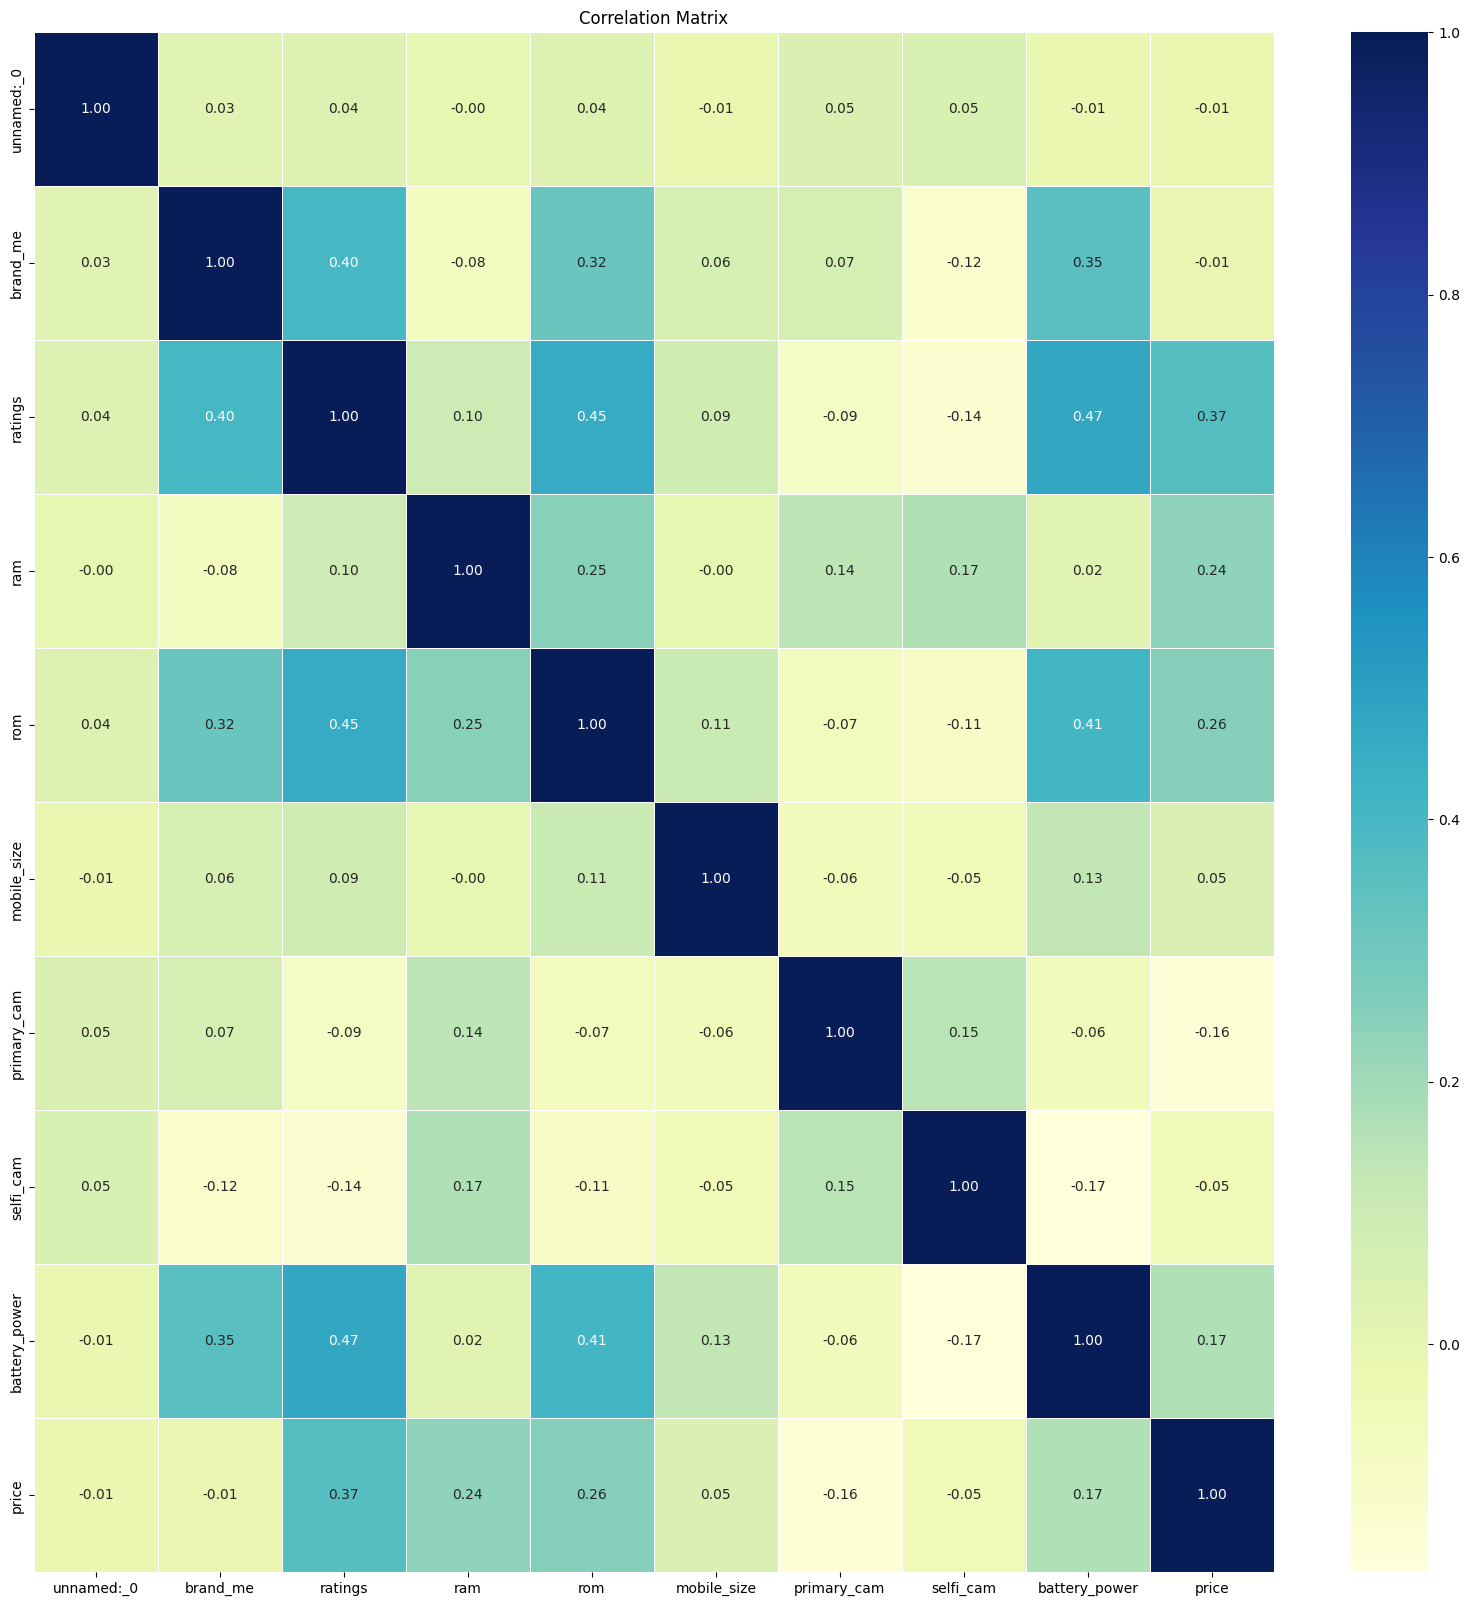

In [ ]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, setting errors='coerce' will convert invalid parsing to NaN

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

correlation_matrix_filled = correlation_matrix.fillna(0)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.isnull().sum()

,0
unnamed:_0,0
brand_me,0
ratings,0
ram,0
rom,0
mobile_size,0
primary_cam,0
selfi_cam,0
battery_power,0
price,0


In [ ]:
data.columns

Index(['unnamed:_0', 'brand_me', 'ratings', 'ram', 'rom', 'mobile_size',
       'primary_cam', 'selfi_cam', 'battery_power', 'price'],
      dtype='object')

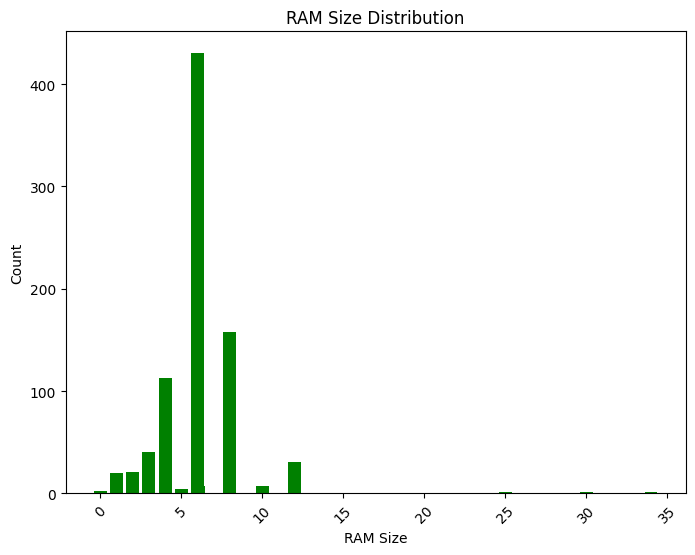

In [ ]:
# Count occurrences of each RAM size
ram_counts = data['ram'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(ram_counts.index, ram_counts.values, color='green')

# Add titles and labels
plt.title('RAM Size Distribution')
plt.xlabel('RAM Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

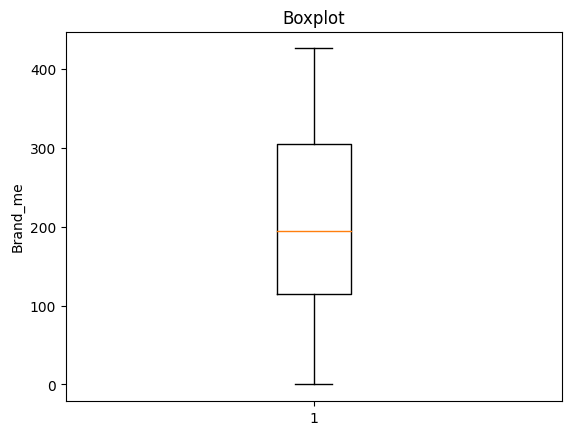

In [ ]:
plt.boxplot(data['brand_me'])
plt.title('Boxplot')
plt.ylabel('Brand_me')
plt.show()

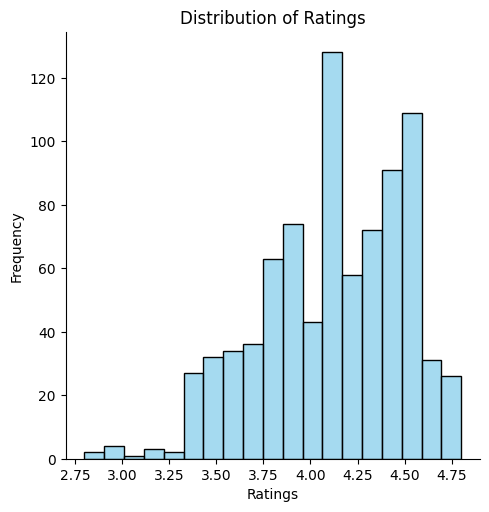

In [ ]:
sns.displot(data["ratings"], color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = data[['unnamed:_0', 'brand_me', 'ratings', 'ram', 'rom', 'mobile_size',
       'primary_cam', 'selfi_cam', 'battery_power']]
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace infinite values with NaN and handle them
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE and select the number of features to keep (e.g., 3)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Features ranked by RFE:")
print(feature_ranking.sort_values('Ranking'))

Features ranked by RFE:
         Feature  Ranking
0     unnamed:_0        1
1       brand_me        1
5    mobile_size        1
2        ratings        2
8  battery_power        3
7      selfi_cam        4
3            ram        5
4            rom        6
6    primary_cam        7


# Model Selection and Building

### Random Forest model

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress only UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [ ]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Model Evaluation:
Accuracy: 0.6130952380952381
              precision    recall  f1-score   support

         559       0.00      0.00      0.00         1
         599       0.00      0.00      0.00         1
         629       0.00      0.00      0.00         2
         639       1.00      0.25      0.40         4
         649       0.45      0.71      0.56         7
         699       0.00      0.00      0.00         1
         715       0.00      0.00      0.00         1
         735       0.00      0.00      0.00         0
         749       1.00      0.67      0.80         3
         785       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         2
         799       0.67      1.00      0.80         2
         849       0.00      0.00      0.00         2
         869       0.00      0.00      0.00         0
         870       0.00      0.00      0.00         1
         890       1.00      1.00      1.00         1
         899       0

# Model

In [ ]:
# Save the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

# To load the model later
loaded_rf_model = joblib.load('random_forest_model.pkl')
